<img src='../img/joint_school_banner_2.png' alt='joint school banner' align='right' width='100%'></img>

<br>

# GOZCARDS / MLS - Water Vapor - Level 3 - Tape recorder

This notebook lets you explore pre-processed H<sub>2</sub>O Level 3 data from the [Global Ozone Chemistry and Related trace gas Data records for the Stratosphere](https://acp.copernicus.org/articles/15/10471/2015/) (GOZCARDS) project as well as the [Aura Microwave Limb Sounder (MLS)](https://mls.jpl.nasa.gov/).

The pre-processed Level 3 data has been provided by [Luis Millan](https://science.jpl.nasa.gov/people/millan/) from the Jet Propulsion Laboratory (JPL). In July this year, he published the paper ['The Hunga Tonga-Hunga H'apai Hydration of the Stratosphere'](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL099381?campaign=woletoc). The paper shows that the H<sub>2</sub>O injection during the Hunga Tonga eruption was unprecedentend in both magnitude (far exceeding any previous values in the 17-year MLS record) and altitude (penetrating into the mesosphere). They conclude that the mass of H<sub>2</sub>O injected may take several years to dissipate. This could have an impact on the climate due to the radiative forcing from the excess stratospheric H<sub>2</sub>O.

This workflow reproduces the tape recorder (10 degrees South to 10 degrees North) (Figure 5a in the published article).

### Basic Facts

The workflow makes use of the data file `timeseries.nc4` in the folder `../../eodata/training_school/mls_gozcards` and contains monthly averaged data (from 60S-60N) based on GOZCARDS and MLS L2 data. The pre-processed data are disseminated in the format `netCDF`.


### How to access the data

The pre-processed data is not publicly available, but can be requested from [Luis Millan](mailto:lmillan@jpl.nasa.gov). Level 2 Aura MLS and GOZCARDS data are available from the following data services:
* [GOZCARDS data via NASA EarthData GES DISC](https://disc.gsfc.nasa.gov/datasets?keywords=GOZCARDS)
* [Aura MLS Data Access](https://mls.jpl.nasa.gov/eos-aura-mls/data-access)

### Ressources

* [Millan et al. (2022): The Hunga Tonga-Hunga H'apai Hydration of the Stratosphere](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL099381?campaign=woletoc)
* [Froidevaux  et al. (2015): Global OZone Chemistry and Related trace gas Data records for the Stratosphere (GOZCARDS): methodlogy and sample results with a focus on HCI, H<sub>2</sub>O and O<sub>3</sub>](https://acp.copernicus.org/articles/15/10471/2015/)

### Module Outline
* [1 - Load the data file to recreate the tape recorder based on GOZCARDS data](#load_tape_gozcards)
  * [11 - Load and visualise GOZCARDS raw measurements](#gozcards_raw)
  * [12 - Load and visualise GOZCARDS measurements interpolated to MLS pressure levels](#gozcards_mls_plev)
  * [13 - Load and visualise GOZCARDS measurements at MLS levels and filled over bad data periods](#gozcards_bad_data)
  * [14 - Load and visualise the computed GOZCARDS tape recorder](#gozcards_tape)
* [2 - Load the data file to recreate the tape recorder based on Aura MLS](#load_mls_tape)
  * [Load and visualize the AURA MLS climatology profile](#load_mls_clim)
  * [Load and visualise the Aura MLS tape recorder](#load_mls_tape_recorder)
* [3 - Combine GOZCARDS and MLS tape recorder information](#mls_gozcards_combine)

<hr>

#### Load required libraries

In [8]:
import os
import xarray as xr
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import matplotlib.colors as colors

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Defined color maps

In [10]:
cmap = matplotlib.colors.ListedColormap(['#DEDDED', '#FEEDD9', '#FDD4AA', '#DFF2A7', '#ADDD8E', '#6DC173', '#7FCDBA',
                                         '#3BB0C4', '#1E7DB6', '#FCC2AC', '#F86144', '#E12E25'])

In [11]:
cmap_clim = matplotlib.colors.ListedColormap(['#6C80BD', '#88A0CB', '#A3C0DB', '#BEE0EC', '#EAEAEA', '#E9CCCD', '#DBAFAF',
                                         '#CE9192', '#C17375', '#B35757', '#A53A3A', '#981D1D', '#8B0000'])

<hr>

## <a id="load_tape_gozcards"></a> Load the data file to recreate the tape recorder based on GOZCARDS data

To recreate the tape recorder based on GOZCARDS data, one has to do four steps:
* interpolate the data to the MLS pressure levels (so that both datasets are on the same pressure levels (`val_mlspre`)
* interpolate in time over bad data periods (`val_filled`)
* compute a climatological profile (`clim`), and
* compute the tape recorder (`tape`, retrieved through e.g. (val-clim) / clim)

The data file `tape_gozALL.nc4` contains all variables required to create the tape recorder based on GOZCARDS data. You can use the xarray function `open_dataset()` to open the data file. You see that it contains the variables from the individual steps described above.

In [15]:
tape_recorder = xr.open_dataset('../../eodata/training_school/mls_gozcards/tape_gozALL.nc4')
tape_recorder

<xarray.Dataset>
Dimensions:     (tim: 120, pre_goz: 31, pre_mls: 55)
Coordinates:
  * pre_goz     (pre_goz) float32 1e+03 681.3 464.2 ... 0.02154 0.01468 0.01
  * pre_mls     (pre_mls) float32 1e+03 825.4 681.3 ... 2.154e-05 1e-05
Dimensions without coordinates: tim
Data variables:
    time        (tim) float32 ...
    val         (pre_goz, tim) float32 ...
    val_mlspre  (pre_mls, tim) float32 ...
    val_filled  (pre_mls, tim) float32 ...
    clim        (pre_mls) float32 ...
    tape        (pre_mls, tim) float32 ...
Attributes:
    Format:                NetCDF
    ContactPersonName:     Luis Millan
    ContactPersonEmail:    lmillan@jpl.nasa.gov
    ContactPersonAddress:  4800 Oak Grove Dr M/S 183-701, Pasadena, CA 91109
    RelatedURL:            http://mls.jpl.nasa.gov/index-eos-mls.php

The time information is stored as seperate variable. However, you will require this information later when you want to combine the GOZCARDS data with the MLS data. Hence, in a next step, you can assign the time variable as coordinate with the xarray function `assign_coords()`.

In [21]:
tape_recorder = tape_recorder.assign_coords(time = tape_recorder.time)
tape_recorder

<xarray.Dataset>
Dimensions:     (tim: 120, pre_goz: 31, pre_mls: 55)
Coordinates:
    time        (tim) float32 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_goz     (pre_goz) float32 1e+03 681.3 464.2 ... 0.02154 0.01468 0.01
  * pre_mls     (pre_mls) float32 1e+03 825.4 681.3 ... 2.154e-05 1e-05
Dimensions without coordinates: tim
Data variables:
    val         (pre_goz, tim) float32 nan nan nan nan ... 2.321 2.097 3.363
    val_mlspre  (pre_mls, tim) float32 140.1 nan -41.48 ... -0.07609 1.815
    val_filled  (pre_mls, tim) float32 140.1 44.67 -41.48 ... -0.07609 1.815
    clim        (pre_mls) float32 47.03 38.67 31.77 ... 0.5579 0.5519 0.5491
    tape        (pre_mls, tim) float32 197.8 -5.008 -188.2 ... -113.9 230.5
Attributes:
    Format:                NetCDF
    ContactPersonName:     Luis Millan
    ContactPersonEmail:    lmillan@jpl.nasa.gov
    ContactPersonAddress:  4800 Oak Grove Dr M/S 183-701, Pasadena, CA 91109
    RelatedURL:            http://mls.jpl.nasa.gov/index-eos-mls.php

Subsequently, we will load and visualise the GOZCARDS measurements for each step above in order to get a better understanding of the data and the outcome of each step.

### <a id='gozcards_raw'></a> Load and visualise GOZCARDS raw measurements

The GOZCARDS raw measurements are stored under the variable name `val`. Once you loaded the data variable, you see that the GOZCARDS data come on 31 pressure levels and 120 time steps, from 1995 to 2004.

In [22]:
gozcards_raw = tape_recorder.val
gozcards_raw

<xarray.DataArray 'val' (pre_goz: 31, tim: 120)>
array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [4.5964 ,     nan, 7.0231 , ..., 5.71225, 4.3875 , 4.70125],
       [4.08535,     nan, 6.1436 , ..., 3.6629 , 3.114  , 4.0887 ],
       [3.6381 ,     nan, 4.635  , ..., 2.32095, 2.0966 , 3.36345]],
      dtype=float32)
Coordinates:
    time     (tim) float32 1.995e+03 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_goz  (pre_goz) float32 1e+03 681.3 464.2 316.2 ... 0.02154 0.01468 0.01
Dimensions without coordinates: tim
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on GOZCARDS L2 data (10S-10N)

The next step is to create a subset of the 31 pressure levels. The xarray function `where()` allows you to select the pressure levels between 100 hPa and 10 hPa. The remaining data points are dropped by setting the keyword argument `drop=True`. The created subset consists of seven pressure levels. 

In [24]:
gozcards_raw_ss = gozcards_raw.where((gozcards_raw.pre_goz >= 10) & (gozcards_raw.pre_goz <= 100), drop=True)
gozcards_raw_ss

<xarray.DataArray 'val' (pre_goz: 7, tim: 120)>
array([[3.20495  ,       nan,       nan,       nan, 3.4795   ,       nan,
        4.5847   , 5.1087   , 5.0294   , 5.2023997,       nan,       nan,
        3.7551498,       nan,       nan,       nan,       nan,       nan,
        4.5390997,       nan, 4.8893   , 4.5724   ,       nan,       nan,
        3.0863998,       nan,       nan, 3.6108499,       nan,       nan,
        4.44135  ,       nan, 5.7815   , 5.5491   ,       nan,       nan,
              nan,       nan, 3.5378501, 4.29145  ,       nan, 4.717    ,
        4.8326   ,       nan, 5.6584496, 5.27485  ,       nan, 3.4478   ,
              nan,       nan,       nan, 3.3536   ,       nan, 4.4159503,
              nan,       nan, 5.38205  , 5.87035  ,       nan, 3.9154003,
              nan,       nan,       nan, 3.72815  ,       nan, 4.5221   ,
              nan,       nan, 5.236    , 4.9467998,       nan, 3.2537   ,
              nan,       nan, 2.7707   ,       nan,       nan, 3.8973498,
              nan, 4.2717   ,       nan,       nan,       nan, 3.3594499,
              nan, 2.6554   ,       nan,       nan,       nan, 4.1692   ,
              nan, 4.58425  , 4.5482   ,       nan,       nan, 3.609    ,
              nan,       nan,       nan,       nan,       nan, 3.6066499,
              nan, 4.4491997,       nan,       nan,       nan,       nan,
              nan, 2.54975  ,       nan, 3.3001   , 3.2088501,       nan,
        4.0909   , 4.6678996, 5.1511497, 4.35095  , 3.93135  , 3.21885  ],
...
        4.734    , 4.501    , 4.3871994, 4.4341006, 4.4458504,       nan,
        4.8141503,       nan, 4.32915  , 4.2395506, 4.308    ,       nan,
        4.62165  ,       nan, 4.37495  , 4.4167   ,       nan,       nan,
        4.6280003,       nan, 4.6901503, 4.7826004,       nan,       nan,
        4.9119   ,       nan, 4.5672503, 4.5334   ,       nan, 4.5377   ,
        4.7037   ,       nan, 4.5782   , 4.39695  ,       nan, 4.5174   ,
        4.56475  ,       nan, 4.3732   , 4.3181   ,       nan, 4.5028   ,
        4.5855   ,       nan, 4.6705   , 4.6894503,       nan, 4.76605  ,
              nan,       nan, 4.4349   , 4.40785  ,       nan, 4.6881   ,
              nan, 4.6787   , 4.7173   , 4.5851502,       nan, 4.5893497,
              nan, 4.51695  , 4.5066   , 4.4259   ,       nan, 4.60415  ,
              nan, 4.6123004, 4.6225   , 4.6917005,       nan, 4.7891498,
              nan, 4.7863007,       nan, 4.60295  ,       nan, 4.5963497,
              nan, 4.4812   , 4.4972005, 4.6584   ,       nan, 4.46335  ,
              nan, 3.9852502, 3.9661   ,       nan, 4.3033   , 4.1126   ,
              nan, 4.2756   , 4.20165  ,       nan, 4.2608   , 4.3337007,
              nan, 4.4199   ,       nan,       nan, 4.2138   ,       nan,
              nan, 4.32445  , 4.4458   , 4.4261   , 4.3577504,       nan,
        4.1609   , 4.1276   , 4.0969   , 4.12915  , 4.2764497, 4.3946004]],
      dtype=float32)
Coordinates:
    time     (tim) float32 1.995e+03 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_goz  (pre_goz) float32 100.0 68.13 46.42 31.62 21.54 14.68 10.0
Dimensions without coordinates: tim
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on GOZCARDS L2 data (10S-10N)

Let us now visualize the subset of the GOZCARDS raw measurements to get a better impression on the nature of the data.

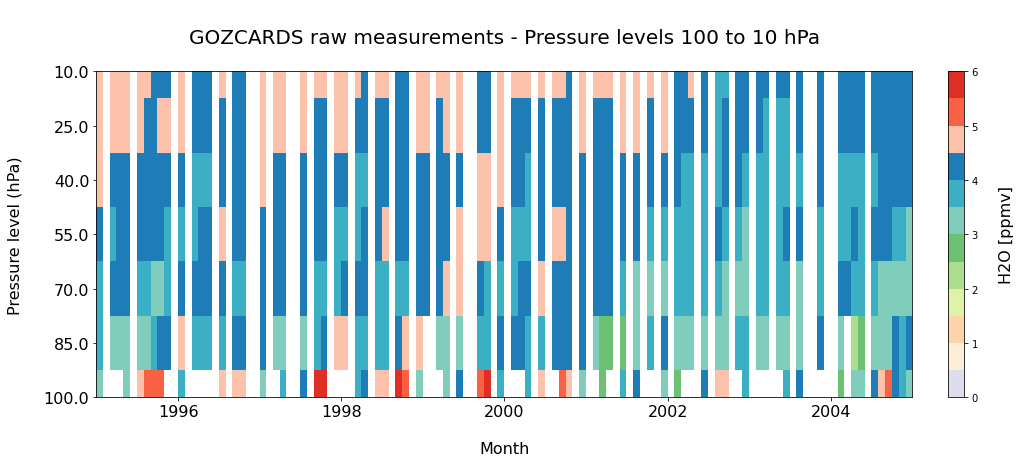

In [66]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=7)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(gozcards_raw_ss.time[::-1], y, gozcards_raw_ss[:,::-1], 
                    cmap=cmap, shading='auto',
                   vmin=0, vmax=6)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nGOZCARDS raw measurements - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nH2O [ppmv]', fontsize=16)

### <a id='gozcards_mls_plev'></a> Load and visualise GOZCARDS measurements interpolated to MLS pressure levels

The same steps as above, you can now repeat with the data variable `val_mlspre`. This variable contains the interpolated data to MLS pressure levels. The number of pressure levels has increased from 31 to 55. The subsetting reduced the number of pressure levels to 13.

In [37]:
gozcards_interp = tape_recorder.val_mlspre
gozcards_interp

gozcards_interp_ss = gozcards_interp.where((gozcards_interp.pre_mls >= 10) & (gozcards_interp.pre_mls <= 100), drop=True)
gozcards_interp_ss

<xarray.DataArray 'val_mlspre' (pre_mls: 13, tim: 120)>
array([[3.20495  ,       nan, 1.5806041, ..., 4.35095  , 3.93135  ,
        3.21885  ],
       [3.5067463,       nan, 2.4159784, ..., 4.1617045, 3.9661093,
        3.6514938],
       [3.7558503,       nan, 3.1055005, ..., 4.0055   , 3.9947996,
        4.0085993],
       ...,
       [4.8032   ,       nan, 4.5874   , ..., 4.2300997, 4.2799   ,
        4.4039497],
       [4.777315 ,       nan, 4.680256 , ..., 4.174797 , 4.27801  ,
        4.398828 ],
       [4.7559495,       nan, 4.7569   , ..., 4.12915  , 4.2764497,
        4.3946004]], dtype=float32)
Coordinates:
    time     (tim) float32 1.995e+03 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_mls  (pre_mls) float32 100.0 82.54 68.13 56.23 ... 14.68 12.12 10.0
Dimensions without coordinates: tim
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on GOZCARDS L2 data (10S-10N) int...

And again, let us visualize the GOZCARDS measurements interpolated to MLS pressure levels.

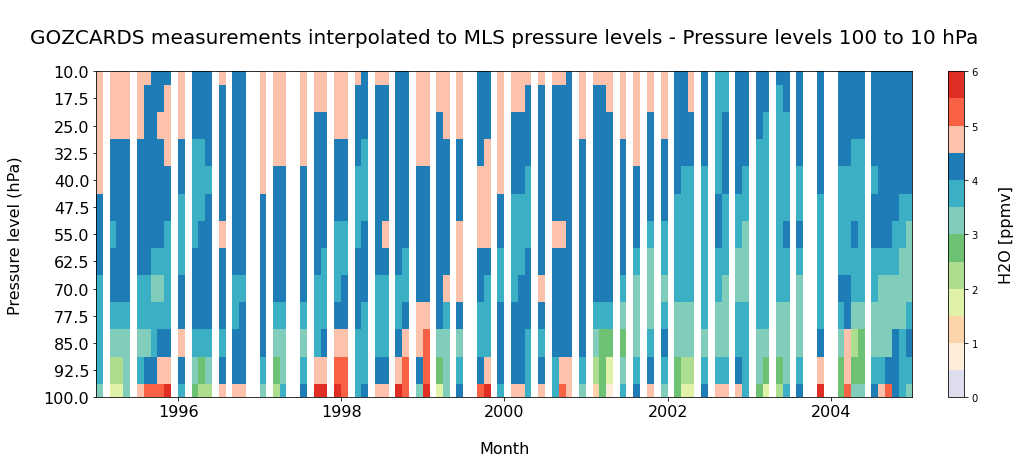

In [65]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(gozcards_interp_ss.time[::-1], y, gozcards_interp_ss[:,::-1], 
                    cmap=cmap, shading='auto',
                   vmin=0, vmax=6)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nGOZCARDS measurements interpolated to MLS pressure levels - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nH2O [ppmv]', fontsize=16)

### <a id='gozcards_bad_data'></a> Load and visualise GOZCARDS measurements at MLS pressure levels and filled over bad data periods

Now, let us repeat the same steps as above again and load the data variable that contains GOZCARDS data interpolated at MLS pressure levels and over bad data periods. 

In [40]:
gozcards_interp_fill = tape_recorder.val_filled

gozcards_interp_fill_ss = gozcards_interp_fill.where((gozcards_interp_fill.pre_mls >= 10) & (gozcards_interp_fill.pre_mls <= 100), drop=True)
gozcards_interp_fill_ss

<xarray.DataArray 'val_filled' (pre_mls: 13, tim: 120)>
array([[3.20495  , 2.3514802, 1.5806041, ..., 4.35095  , 3.93135  ,
        3.21885  ],
       [3.5067463, 2.933631 , 2.4159784, ..., 4.1617045, 3.9661093,
        3.6514938],
       [3.7558503, 3.414141 , 3.1055005, ..., 4.0055   , 3.9947996,
        4.0085993],
       ...,
       [4.8032   , 4.6898136, 4.5874   , ..., 4.2300997, 4.2799   ,
        4.4039497],
       [4.777315 , 4.726318 , 4.680256 , ..., 4.174797 , 4.27801  ,
        4.398828 ],
       [4.7559495, 4.7564487, 4.7569   , ..., 4.12915  , 4.2764497,
        4.3946004]], dtype=float32)
Coordinates:
    time     (tim) float32 1.995e+03 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_mls  (pre_mls) float32 100.0 82.54 68.13 56.23 ... 14.68 12.12 10.0
Dimensions without coordinates: tim
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on GOZCARDS L2 data (10S-10N) int...

And now, let us visualize the GOZCARDS measurements interpolated at MLS pressure levels and over bad data periods.

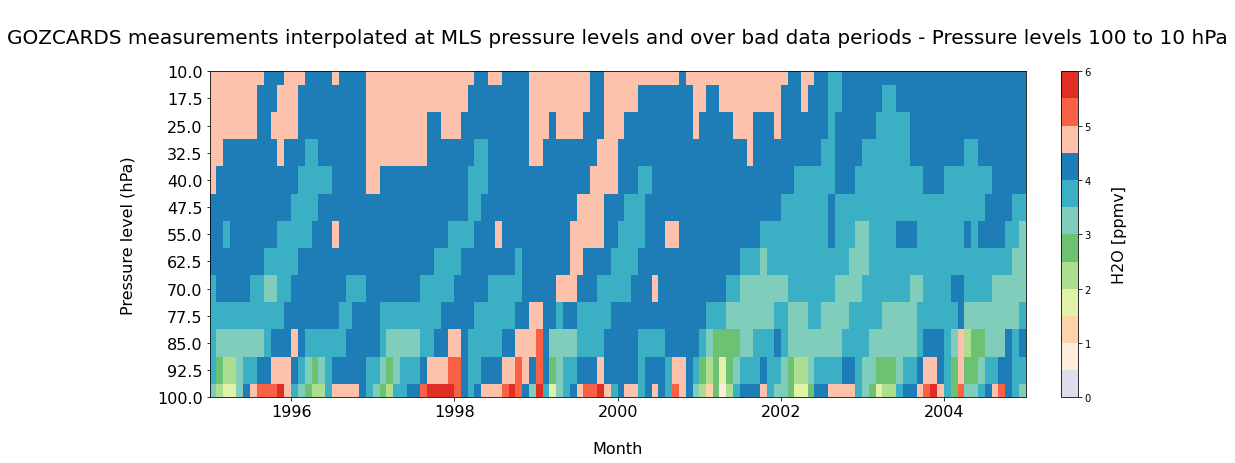

In [64]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(gozcards_interp_fill_ss.time[::-1], y, gozcards_interp_fill_ss[:,::-1], 
                    cmap=cmap, shading='auto',
                   vmin=0, vmax=6)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nGOZCARDS measurements interpolated at MLS pressure levels and over bad data periods - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nH2O [ppmv]', fontsize=16)

### <a id='gozcards_tape'></a> Load and visualise the computed GOZCARDS tape recorder

As a last step, you can now load the variable `tape`, which contains the computed tape recorder based on GOZCARDS data. The tape recorder was calculated with the help of the other data variables with the following equation:

`(val-clim) / clim`

In [43]:
gozcards_tape = tape_recorder.tape

gozcards_tape_ss = gozcards_tape.where((gozcards_tape.pre_mls >= 10) & (gozcards_tape.pre_mls <= 100), drop=True)
gozcards_tape_ss

<xarray.DataArray 'tape' (pre_mls: 13, tim: 120)>
array([[-18.863049  , -40.46961   , -59.985214  , ...,  10.149234  ,
         -0.47341117, -18.51116   ],
       [ -8.309001  , -23.294264  , -36.82934   , ...,   8.816202  ,
          3.701975  ,  -4.524288  ],
       [  0.93879354,  -8.244674  , -16.53942   , ...,   7.6481466 ,
          7.3605714 ,   7.731447  ],
       ...,
       [ 10.806983  ,   8.191227  ,   5.8286085 , ...,  -2.4140964 ,
         -1.2652311 ,   1.5965205 ],
       [  7.8825593 ,   6.730931  ,   5.69075   , ...,  -5.7236567 ,
         -3.3928766 ,  -0.6645317 ],
       [  5.5601783 ,   5.5712614 ,   5.5812716 , ...,  -8.351886  ,
         -5.0825095 ,  -2.4601078 ]], dtype=float32)
Coordinates:
    time     (tim) float32 1.995e+03 1.995e+03 1.995e+03 ... 2.005e+03 2.005e+03
  * pre_mls  (pre_mls) float32 100.0 82.54 68.13 56.23 ... 14.68 12.12 10.0
Dimensions without coordinates: tim
Attributes:
    units:        %
    long_name:    Tape recorder
    description:  Water vapor tape recorder base on GOZCARDS data (10S-!10N)

The calculate tape recorder show the delta of water vapor of different pressure levels in %, based on a long term mean. For the tape recorder visualisation you can use the color map `cmap_clim`, which was defined at the beginning of this notebook.

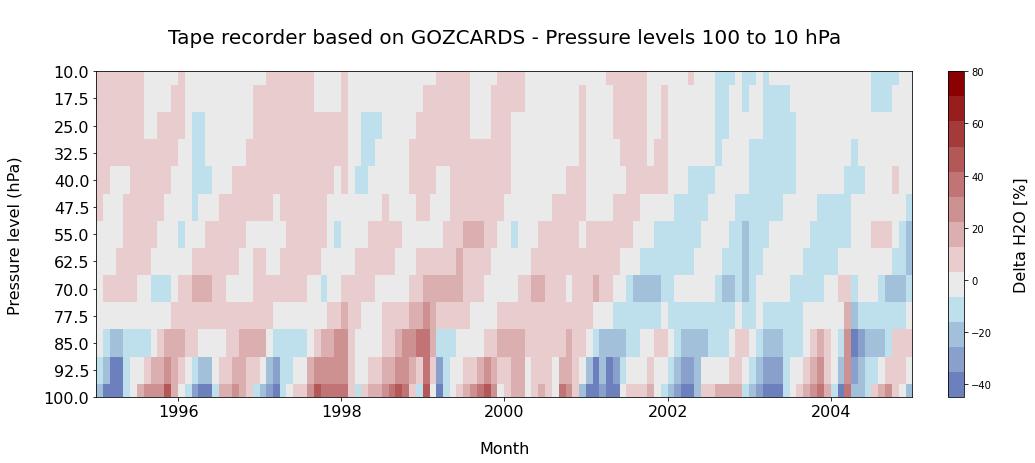

In [63]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(gozcards_tape_ss.time[::-1], y, gozcards_tape_ss[:,::-1], 
                    cmap=cmap_clim, shading='auto',
                   vmin=-45, vmax=80)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nTape recorder based on GOZCARDS - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nDelta H2O [%]', fontsize=16)

## <a id='load_mls_tape'></a> Load the data file to recreate the tape recorder based on Aura MLS

The next step is to load the data file `tape_mlsAll.nc4`, which contains the datasets required to visualize the climatology profile and tape recorder based on Aura MLS data.

Below, you see that the dataset contains five variables: `time`, `pre`, `clim`, `tape` and `val`.

In [49]:
tape_recorder_mls = xr.open_dataset('../../eodata/training_school/mls_gozcards/tape_mlsALL.nc4')
tape_recorder_mls

<xarray.Dataset>
Dimensions:  (tim: 216, lev: 55)
Dimensions without coordinates: tim, lev
Data variables:
    time     (tim) float32 ...
    pre      (lev) float32 ...
    clim     (lev) float32 ...
    tape     (lev, tim) float32 ...
    val      (lev, tim) float32 ...
Attributes:
    Format:                NetCDF
    ContactPersonName:     Luis Millan
    ContactPersonEmail:    lmillan@jpl.nasa.gov
    ContactPersonAddress:  4800 Oak Grove Dr M/S 183-701, Pasadena, CA 91109
    RelatedURL:            http://mls.jpl.nasa.gov/index-eos-mls.php

As next steps, let us assign the time information as a coordinate with the function `assign_coords()`. Further, we can again create a subset to filter only the pressure levels between 100 hPa and 10 hPa. Subsequently, the number pressure levels reduced from 55 to 13.

In [67]:
tape_recorder_mls = tape_recorder_mls.assign_coords(time = tape_recorder_mls.time)

tape_recorder_mls_ss = tape_recorder_mls.where((tape_recorder_mls.pre >= 10) & (tape_recorder_mls.pre <=100), drop=True)
tape_recorder_mls_ss

<xarray.Dataset>
Dimensions:  (lev: 13, tim: 216)
Coordinates:
    time     (tim) float32 2.005e+03 2.005e+03 2.005e+03 ... 2.023e+03 2.023e+03
Dimensions without coordinates: lev, tim
Data variables:
    pre      (lev) float32 100.0 82.54 68.13 56.23 ... 17.78 14.68 12.12 10.0
    clim     (lev) float32 3.83 3.666 4.01 3.99 3.985 ... 4.42 4.513 4.518 4.667
    tape     (lev, tim) float32 -17.99 -21.53 -12.63 -11.27 ... nan nan nan
    val      (lev, tim) float32 3.141 3.005 3.347 3.399 ... 6.534 nan nan nan
Attributes:
    Format:                NetCDF
    ContactPersonName:     Luis Millan
    ContactPersonEmail:    lmillan@jpl.nasa.gov
    ContactPersonAddress:  4800 Oak Grove Dr M/S 183-701, Pasadena, CA 91109
    RelatedURL:            http://mls.jpl.nasa.gov/index-eos-mls.php

### <a id='load_mls_clim'></a>Load and visualize the AURA MLS climatology profile

Let us now load the data variable `val`, which is the climatology profile based on 2005-2021 data.

In [57]:
mls_clim = tape_recorder_mls_ss.val
mls_clim

<xarray.DataArray 'val' (lev: 13, tim: 216)>
array([[3.1411498, 3.0054383, 3.3465996, ...,       nan,       nan,
              nan],
       [3.0485349, 2.7029266, 2.77528  , ...,       nan,       nan,
              nan],
       [4.160624 , 3.7994857, 3.4225628, ...,       nan,       nan,
              nan],
       ...,
       [4.617562 , 4.3805847, 4.094813 , ...,       nan,       nan,
              nan],
       [4.6475205, 4.5637007, 4.30196  , ...,       nan,       nan,
              nan],
       [4.6522107, 4.7015014, 4.589612 , ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    time     (tim) float32 2.005e+03 2.005e+03 2.005e+03 ... 2.023e+03 2.023e+03
Dimensions without coordinates: lev, tim
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on MLS L2 data

And now we can again visualize the climatology profile based on Aura MLS data.

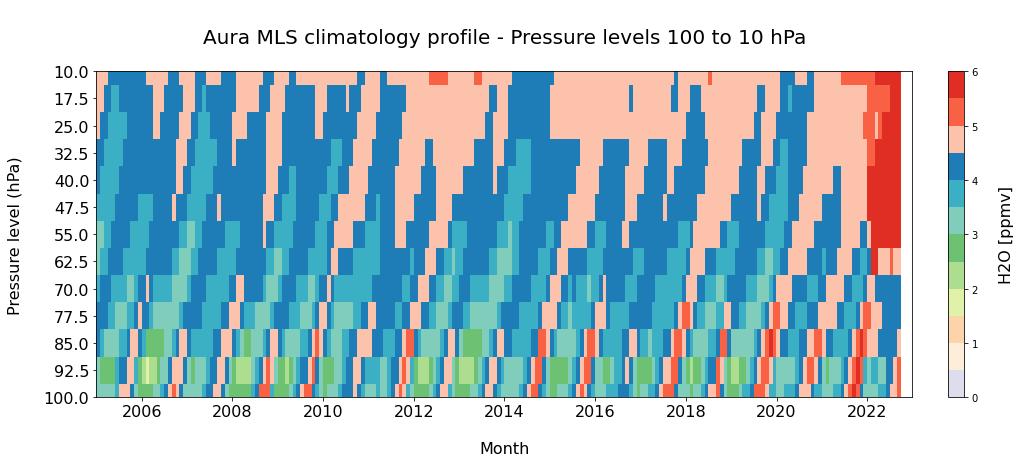

In [58]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(mls_clim.time[::-1], y, mls_clim[:,::-1], 
                    cmap=cmap, shading='auto',
                   vmin=0, vmax=6)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nAura MLS climatology profile - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nH2O [ppmv]', fontsize=16)

### <a id='load_mls_tape_recorder'></a> Load and visualise the Aura MLS tape recorder

As a next step, you can now load the tape recorder based on Aura MLS data. The data variable is called `tape`. The tape recorder information has been computed with the following equation:

`(val-clim) / clim`

In [59]:
mls_tape = tape_recorder_mls_ss.tape
mls_tape

<xarray.DataArray 'tape' (lev: 13, tim: 216)>
array([[-17.989948  , -21.533142  , -12.626005  , ...,          nan,
                 nan,          nan],
       [-16.839811  , -26.267569  , -24.29386   , ...,          nan,
                 nan,          nan],
       [  3.765317  ,  -5.241417  , -14.641814  , ...,          nan,
                 nan,          nan],
       ...,
       [  2.3262973 ,  -2.925173  ,  -9.257947  , ...,          nan,
                 nan,          nan],
       [  2.8630576 ,   1.0078819 ,  -4.785196  , ...,          nan,
                 nan,          nan],
       [ -0.31738028,   0.73876745,  -1.6586787 , ...,          nan,
                 nan,          nan]], dtype=float32)
Coordinates:
    time     (tim) float32 2.005e+03 2.005e+03 2.005e+03 ... 2.023e+03 2.023e+03
Dimensions without coordinates: lev, tim
Attributes:
    units:        %
    long_name:    Tape recorder
    description:  Water vapor tape recorder base on MLS L2 data

And now you can plot the tape recorder based on Aura MLS data. As a reminder, the tape recorder shows the water vapor delta in % for different pressure levels. The Hunga Tonga eruption is clearly seen with unprecedented high water vapor values.

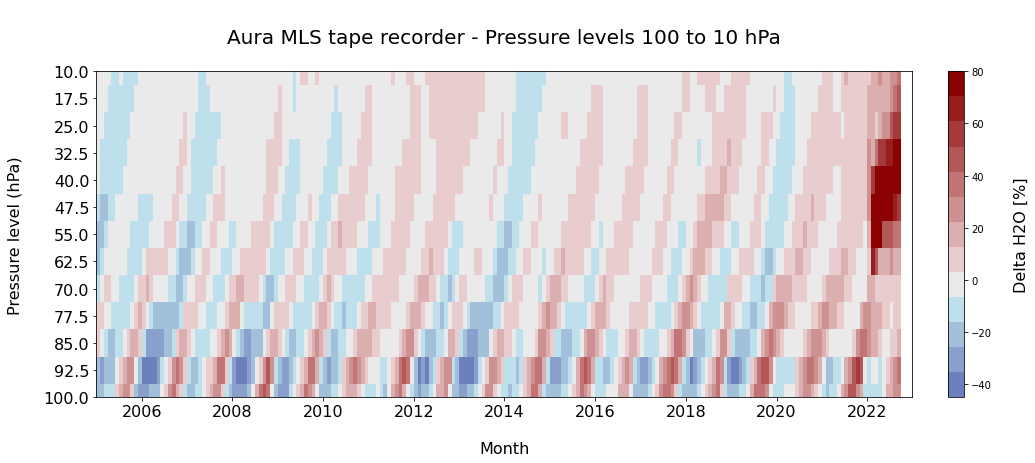

In [68]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(mls_tape.time[::-1], y, mls_tape[:,::-1], 
                    cmap=cmap_clim, shading='auto',
                   vmin=-45, vmax=80)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nAura MLS tape recorder - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nDelta H2O [%]', fontsize=16)

## <a id='mls_gozcards_combine'></a> Combine GOZCARDS and MLS tape recorder information

The last step is now to combine the computed tape recorders from GOZCARDS and Aura MLS data. You can combined two xarray.DataArrays with the xarray function `concat()`. In order to do this, however, you have to rename the `pre_mls` dimension of the GOZCARDS tape recorder data array to `lev`.

In [ ]:
gozcards_tape_ss = gozcards_tape_ss.rename({'pre_mls': 'lev'})
gozcards_tape_ss

combined = xr.concat([gozcards_tape_ss, mls_tape], dim='tim')
combined

The last step is now to visualize the combined tape recorders from GOZCARDS (1995-2004) and Aura MLS (2005-2022). The increase of water vapor content due to the Hunga Tonga eruption has been unprecendeted for the past 25 years.

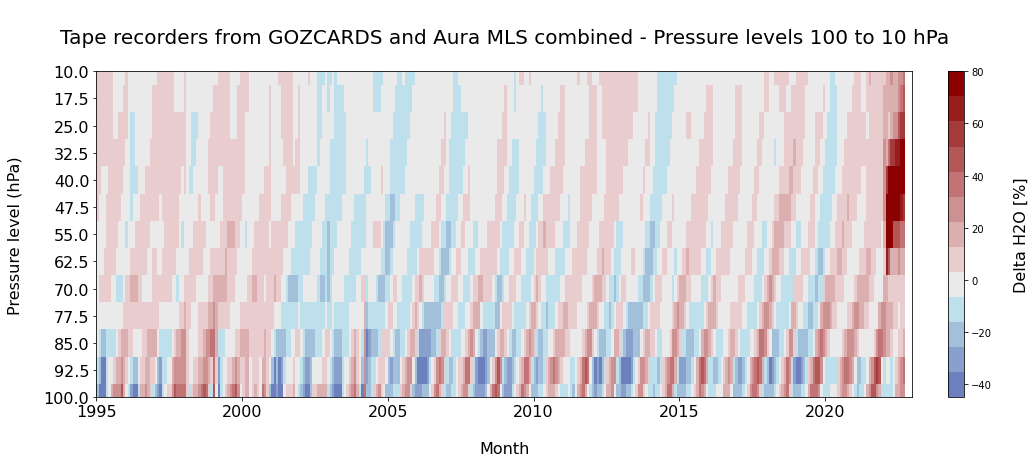

In [62]:
# Define the figure and specify size
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot()

y = np.linspace(10., 100., num=13)
ax.set_ylim(bottom=10., top=100.)

# Plot the figure with pcolormesh
im = plt.pcolormesh(combined.time[::-1], y, combined[:,::-1], 
                    cmap=cmap_clim, shading='auto',
                   vmin=-45, vmax=80)

ax.yaxis.set_ticks(y[::-1])
ax.yaxis.set_ticklabels(y, fontsize=16)
plt.xticks(fontsize=16)

# Set axes labels and title
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylabel('Pressure level (hPa)\n', fontsize=16)

ax.set_title('\nTape recorders from GOZCARDS and Aura MLS combined - Pressure levels 100 to 10 hPa\n', fontsize=20)

# Specify a colorbar
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('\nDelta H2O [%]', fontsize=16)

<br>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a>.</p>